In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [109]:
data = pd.read_csv('./data/skyscrapper.csv')

ts = data.relative_time/1000 # Use seconds instead of ms
az = data.AccZ

ts = ts.as_matrix()
az = az.as_matrix()

data.head()

,relative_time,AccZ
0,0,9.017136
1,1,7.230896
2,32,5.992599
3,59,5.594193
4,60,6.971268


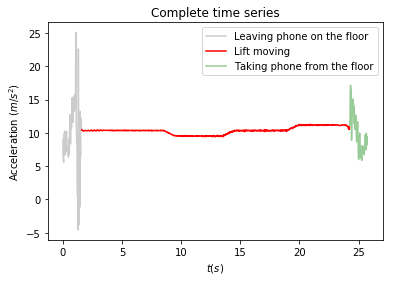

In [154]:
indices = [0, 80, 1185, ts.size]
ts_init = ts[indices[0]:indices[1]]
az_init = az[indices[0]:indices[1]]

ts_experiment = ts[indices[1]:indices[2]]
az_experiment = az[indices[1]:indices[2]]

ts_out = ts[indices[2]:indices[3]]
az_out = az[indices[2]:indices[3]]

plt.plot(ts_init, az_init, color='gray', alpha=0.4)
plt.plot(ts_experiment, az_experiment, color='red')
plt.plot(ts_out, az_out, color='green', alpha=0.4)

plt.title('Complete time series')
plt.xlabel('$t (s)$')
plt.ylabel('Acceleration $(m / s^2)$')
plt.legend(['Leaving phone on the floor', 'Lift moving', 'Taking phone from the floor']);

# plt.plot(az)

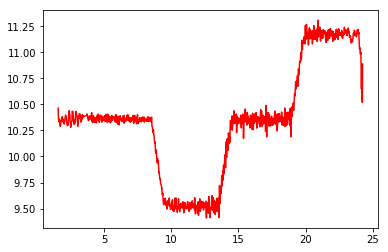

In [155]:
plt.plot(ts_experiment, az_experiment, color='red')

In [156]:
az_experiment_detrended = az_experiment - az_experiment.mean()

In [157]:
from scipy import integrate
import numpy as np

In [158]:
v = np.zeros(ts_experiment.size-1)
for i in range(1, ts_experiment.size):
    y_temp = az_experiment_detrended[:i]
    t_temp = ts_experiment[:i]
    v[i-1] = integrate.simps(y_temp, t_temp)
    
x = np.zeros(ts_experiment.size-2)
for i in range(1, ts_experiment.size-1):
    y_temp = v[:i]
    t_temp = ts_experiment[:i]
    x[i-1] = integrate.simps(y_temp, t_temp)

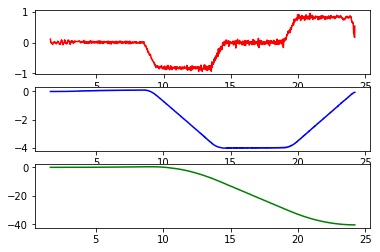

In [159]:
plt.subplot(311)
plt.plot(ts_experiment, az_experiment_detrended, color='red')

plt.subplot(312)
plot(ts_experiment[1:], v, color='blue')

plt.subplot(313)
plot(ts_experiment[2:], x, color='green')

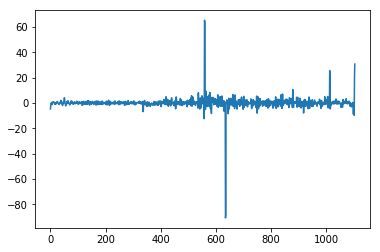

In [160]:
plot(np.gradient(az_experiment_detrended, ts_experiment))